In [12]:
import numpy as np 
from numpy import linalg

In [13]:
def areweDoneYet(oldC, c):
    return np.linalg.norm(c - oldC) < 0.001


In [39]:
def gradDescentForL(A,b,oldC,lam = 0.1):
    c = oldC - lam * (2 *np.transpose(A)@A@oldC + b)
    iterNum = 1
    print(A, np.transpose(A))
    while not areweDoneYet(oldC,c):
        oldC = c
        c =oldC - lam * (2 *np.transpose(A)@A@oldC + b)
        iterNum+=1
        # print(np.linalg.norm(oldC - c))
        # print(iterNum)
    return iterNum,c

In [40]:
A = np.array([[1,0],
[0,1]])
b = np.array([[-3],
[4]])
oldC = np.array([[1],
[2]])
print(oldC)
result = gradDescentForL(A,b,oldC)
print('The number of iterations: ',result[0], '\n The value of c',result[1])

[[1]
 [2]]
[[1 0]
 [0 1]] [[1 0]
 [0 1]]
The number of iterations:  31 
 The value of c [[ 1.49950482]
 [-1.99603859]]


[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


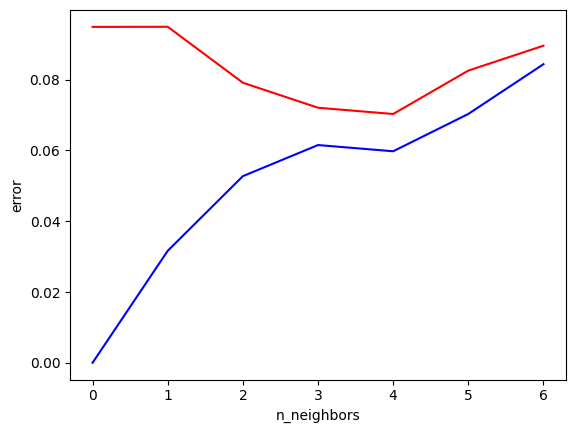

In [1]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

X,y = load_breast_cancer(return_X_y = True)
# X_train,X_test, y_train,y_test = train_test_split(X,y)
d = 6
print(X)
OUT_model_score = []
IN_model_score = []
for values in range(0,d+1):
    model = KNeighborsClassifier(n_neighbors = 2 ** values)
    model.fit(X,y)
    IN_model_score.append(1 - model.score(X,y))
    scores = cross_val_score(model,X,y)
    OUT_model_score.append(1- scores.mean())

plt.plot(range(0,d+1),IN_model_score, "-b", label = 'insample')
plt.plot(range(0,d+1),OUT_model_score,"-r", label = 'outsample')
plt.xlabel('n_neighbors')
plt.ylabel('error')
plt.show()


    


In [34]:
from tabulate import tabulate
eps = 0.2
conf = 0.9
delta = 0.1
dvc = [1,3,10,30]
oldN = 0
res = []
fake_res = []
for values in dvc:
    N = values
    while int(N) != int(oldN):
        oldN = N
        N = (8 / (eps ** 2 )) * (np.log(float(4 * (((2 * oldN) ** values) + 1)) / delta))

    res.append(oldN)
    oldN = 0
    fake_res.append(values * 10)

headers = ['vc dimension','rule of thumb','actual N']
table = [[dvc[vals],fake_res[vals],res[vals]] for vals in range(len(dvc))]
print(tabulate(table ,headers, tablefmt = 'github'))
    

|   vc dimension |   rule of thumb |   actual N |
|----------------|-----------------|------------|
|              1 |              10 |    2436.07 |
|              3 |              30 |    6413.28 |
|             10 |             100 |   22133.6  |
|             30 |             300 |   72003.2  |
